# Mining Statistical Patterns with SPADE

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import quantities as pq
from elephant.spike_train_generation import compound_poisson_process, homogeneous_poisson_process
from elephant.spade import spade
from viziphant.rasterplot import rasterplot
from viziphant.patterns import plot_patterns

np.random.seed(100)
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## 1 Preparation

Download the data required for this notebook

In [3]:
import os
import requests
import zipfile

url = "https://uni-bonn.sciebo.de/s/FV84Gvj3ZKHPN4Z"
fname = "allen"

if not os.path.exists("../data"):
    os.mkdir("../data")

if not os.path.exists(f"../data/{fname}"):
    response = requests.get(f"{url}/download")
    with open(f"{fname}.zip", "wb") as file:
        file.write(response.content)

    with zipfile.ZipFile(f"{fname}.zip", "r") as zip_ref:
        zip_ref.extractall(f"../data/{fname}")
        os.remove(f"{fname}.zip")

Define the utility functions required for this notebook.

In [4]:
from neo.core import SpikeTrain


class utils:
    def load_spike_trains(brain_areas=None):
        """
        Load spikes from given session and brain area.
        """
        session = "ses-778240327"
        spikes = pd.read_parquet(f"../data/allen/{session}/flash_spikes.parquet")
        stimuli = pd.read_parquet(f"../data/allen/{session}/flash_stimuli.parquet")

        if brain_areas is not None:
            if isinstance(brain_areas, str):
                brain_areas = [brain_areas]
                spikes = spikes[spikes["brain_area"].isin(brain_areas)]

        # select spikes that happen within 400 ms after stimulus onset
        spike_times = spikes["spike_time"].to_numpy()
        stim_times = stimuli["start_time"].to_numpy()
        condition_matrix = (spike_times[:, None] >= stim_times) & (
            spike_times[:, None] < stim_times + 0.4
        )
        mask = condition_matrix.any(axis=1)
        spikes = spikes[mask]
        spikes[spikes["spike_time"] <= 60]  # limit recording to 1 min

        spike_trains = []
        for unit_id in spikes["unit_id"].unique():
            brain_area = spikes[spikes["unit_id"] == unit_id]["brain_area"].iloc[0]
            spike_times = spikes[spikes["unit_id"] == unit_id]["spike_time"].to_numpy()
            spike_train = SpikeTrain(
                spike_times,
                units="s",
                t_start=spikes["spike_time"].min() - 1,
                t_stop=spikes["spike_time"].max() + 1,
                name=brain_area,
            )
            if len(spike_train.times) > 50:  # select units with at least 50 spikes
                spike_trains.append(spike_train)
        return spike_trains

    def find_synchronous_spikes(spike_trains):
        """
        Find the synchronous spikes in a list of spike trains.
        Arguments:
            sts (List of SpikeTrain): list of spike train objects.
        Returns:
            (np.ndarray): 1-dimensional array of the synchronous spike times (times are repeated for each synchronous spikes)
            (np.ndarray): 1-dimensional array with the indices of the spike trains containing the synchronous spikes
        """
        all_spikes = np.concatenate([spike_train.times for spike_train in spike_trains])
        all_trains = np.concatenate(
            [[i] * len(spike_train.times) for i, spike_train in enumerate(spike_trains)]
        )
        times = []
        units = []
        for s in np.unique(all_spikes):
            idx = np.where(all_spikes == s)[0]
            if len(idx) > 1:
                times.append(all_spikes[idx])
                units.append(all_trains[idx])
        if len(times) > 0:
            times = np.concatenate(times)
            units = np.concatenate(units)
        else:
            times = np.array([])
            units = np.array([])
            print("Found no synchronous spikes")
        return times, units

## 2 Simulating Synchronous Spiking

| Code | Description |
|------------------------------------|------------------------------------|
| `sts = compound_poission_process(rate, amplitude_distribution, t_stop)` | Generate a list of spike trains from a compound poission process with a given `rate` and `amplitude_distribution` that determines the probability of synchronous spikes. Each spike train starts at time 0 and goes to `t_stop` |
| `rasterplot(sts)` | Create a raster plot for a list of spike trains |
| `x,y = find_synchronous_spikes(spiketrains)` | Returns the times `x` and indices `y` of synchronous spikes in a list of `spiketrains` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 1**</span> Generate 6
(`len(amplitude_distribution)-1`) spike trains with a firing rate of `5`
Hz and a duration of `10` s from a `compound_poisson_process` where the
probability of synchronous spikes in all 6 spike trains is `0.01` (1%).

In [5]:
amplitude_distribution=[0, 0.99, 0, 0, 0, 0, 0.01]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)

<span class="theorem-title">**Example 2**</span> Generate 9
(`len(amplitude_distribution)-1`) spike trains with a firing rate of `5`
Hz and a duration of `10` s from a `compound_poisson_process` where the
probability of synchronous spikes in 2 of the 9 spike trains is `0.03`
(3%) and the probability of synchronous spikes in 8 of the 0 spike
trains is `0.01` (1%).

In [6]:
amplitude_distribution=[0, 0.96, 0.03, 0, 0, 0, 0, 0, 0.01, 0]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)

<span class="theorem-title">**Exercise 1**</span> How many spike trains
does the `compound_poissoin_process` in the cell below generate? What is
the probability of a synchronous spike in all spike trains? Print the
length of the returned spike train list `sts`.

In [7]:
amplitude_distribution=[0, 0.7, 0, 0, 0.3]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)

<span class="theorem-title">**Exercise 2**</span> Generate 7 spike
trains with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` where the probability of synchronous spikes
in all 9 spike trains is `0.1` (10%) and print the length of the
returned list of spike trains

<span class="theorem-title">**Exercise 3**</span> Generate 4 spike
trains with a firing rate of `5` Hz and a duration of `10` s from a
`compound_poisson_process` where the probability of synchronous spikes
in 2 of the 4 spike trains is `0.05` (5%) and the probability of a
synchronous spike in 3 of the 4 spikes is `0.01` (1%) and print the
length of the returned list of spike trains.

<span class="theorem-title">**Example 3**</span> Find the time points
`x` and the spike train indices `y` of spikes in the spike train list
`sts` that occurr synchronousy in multiple trains.

In [11]:
x, y = utils.find_synchronous_spikes(sts)

<span class="theorem-title">**Example 4**</span> Create a `rasterplot`
for the list of spike trains `sts` and highlight the synchronous spikes
red.

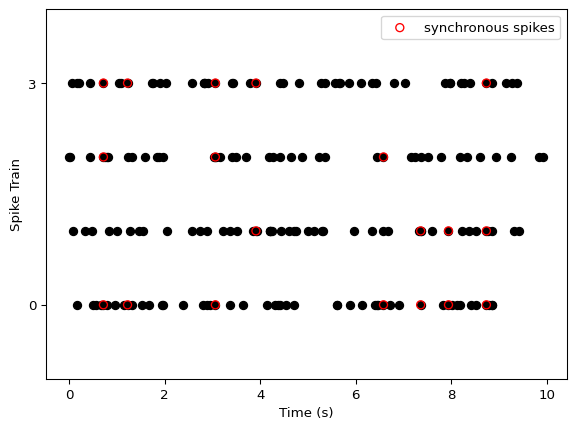

In [12]:
rasterplot(sts, color="black")
plt.scatter(
    x, y, color="red", label="synchronous spikes", marker="o", facecolors="none"
)
plt.ylabel("Spike Train")
plt.ylim(-1, len(sts))
plt.legend()

<span class="theorem-title">**Exercise 4**</span> Create a raster plot
for the list of spike trains `sts` generated in the cell below and
highlight the synchronous spikes.

In [13]:
amplitude_distribution=[0, 0.99, 0, 0, 0, 0.01]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)

<span class="theorem-title">**Exercise 5**</span> Create a raster plot
for the list of spike trains `sts` generated in the cell below and
highlight the synchronous spikes.

In [15]:
amplitude_distribution=[0, 0.85, 0.1, 0, 0.05, 0, 0]
sts = compound_poisson_process(
    rate=5 * pq.Hz, amplitude_distribution=amplitude_distribution, t_stop=10 * pq.s
)

## 3 Finding Synchronous Events with SPADE

| Code | Description |
|------------------------------------|------------------------------------|
| `patterns = spade(spiketrains, binsize, winlen)["patterns"]` | Run the SPADE algorithm on a list of `spiketrains`, dividing them into bins of a given `binsize` and searching for synchronous activity within a window of a given `winlen`. Extract the detected `["patterns"]` and assign them to a variable `patterns` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 5**</span> Generate 10 spike
trains with synchronous spikes from a `compound_poisson_process` and add
90 purely random spike trains from a `homogeneous_poisson_process`.

In [17]:
rate = 3 * pq.Hz
t_stop = 15 * pq.s
sts = compound_poisson_process(
    rate=rate,
    amplitude_distribution=[0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0.5],
    t_stop=t_stop,
)
for i in range(90):
    sts.append(homogeneous_poisson_process(rate=rate, t_stop=t_stop))
print("Number of spike trains:", len(sts))

Number of spike trains: 100

<span class="theorem-title">**Example 6**</span> Apply SPADE to the
simulated data with a `binsize` of 1 ms and a window length (`winlen`)
of 1 bin. Create `100` surrogate data sets (`n_surr`) for statistical
evaluation. Print the number of detected `patterns`.

In [18]:
patterns = spade(
    spiketrains=sts,
    binsize=5 * pq.ms,
    winlen=1,
    n_surr=100,
)["patterns"]
print("number of patterns found:", len(patterns))

Time for data mining: 0.2342367172241211
Time for pvalue spectrum computation: 23.36027693748474
number of patterns found: 575

<span class="theorem-title">**Exercise 6**</span> Apply SPADE to the
simulated data and change `binsize` to 3 ms. Print the number of
detected `patterns`.

<span class="theorem-title">**Exercise 7**</span> Apply SPADE to the
simulated data and set `binsize` to 3 ms and `winlen` to 5. Print the
number of detected `patterns`.

<span class="theorem-title">**Example 7**</span> Iterate all `patterns`,
find the ones that are significant (p\<0.05) and print the `'neurons'`
and the `'signature'` that describes how often the pattern occurrs

In [21]:
for pattern in patterns:
    if pattern["pvalue"]<0.05:
        print(f"Significant pattern with neurons {pattern['neurons']} ocurred {pattern['signature'][1]} times")

Significant pattern with neurons [97, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [12, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [98, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [62, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [21, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [20, 3, 0, 2, 5, 7, 6, 9, 1, 4, 8] ocurred 2 times
Significant pattern with neurons [72, 3, 6, 0, 2, 1, 7, 4, 5, 9, 8] ocurred 2 times
Significant pattern with neurons [80, 3, 6, 0, 2, 1, 7, 4, 5, 9, 8] ocurred 2 times
Significant pattern with neurons [93, 3, 6, 0, 2, 1, 7, 4, 5, 9, 8] ocurred 2 times
Significant pattern with neurons [51, 3, 0, 2, 6, 9, 1, 5, 8, 7, 4] ocurred 2 times
Significant pattern with neurons [65, 2, 0, 3, 1, 6, 7, 5, 9, 4, 8] ocurred 2 times
Significant pattern with neurons [76, 2, 0, 3, 1, 6, 7, 5, 9, 4, 8] ocurred 

<span class="theorem-title">**Exercise 8**</span> Rerun SPADE from
<a href="#exr-spade1" class="quarto-xref">Exercise 7</a> but add the
parameter `min_occ=5`. Then, print all significant patterns as
demonstrated in <a href="#exm-sig" class="quarto-xref">Example 7</a>.

<span class="theorem-title">**Exercise 9**</span> Run the cell below to
generate a new list of spike trains. Then, rerun the code from
<a href="#exr-min_occ" class="quarto-xref">Exercise 8</a> to find the
significant patterns in the spike trains. Did you find any patterns? If
not, why?

In [23]:
rate = 3 * pq.Hz
t_stop = 15 * pq.s
sts = compound_poisson_process(
    rate=rate,
    amplitude_distribution=[0, 0.99, 0, 0, 0, 0, 0, 0, 0, 0, 0.01],
    t_stop=t_stop,
)
for i in range(90):
    sts.append(homogeneous_poisson_process(rate=rate, t_stop=t_stop))
print("Number of spike trains:", len(sts))

Number of spike trains: 100

<span class="theorem-title">**Exercise 10**</span> Rerun the code from
<a href="#exr-min_occ" class="quarto-xref">Exercise 8</a> again but set
`min_occ=2`. Did you find any significant patterns now?

## 4 Visualize Patterns Detected with SPADE

| Code | Descriptions |
|------------------------------------|------------------------------------|
| `plot_patterns(spiketrains, patterns)` | Create a raster plot for the list of `spiketrains` and highlight the given `patterns` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 8**</span> Simulate spike trains
and find the `patterns` of synchronous firing with SPADE.

In [26]:
rate = 3 * pq.Hz
t_stop = 15 * pq.s
sts = compound_poisson_process(
    rate=rate,
    amplitude_distribution=[0, 0.95, 0, 0, 0.03, 0, 0, 0, 0, 0, 0.02],
    t_stop=t_stop,
)
for i in range(90):
    sts.append(homogeneous_poisson_process(rate=rate, t_stop=t_stop))

patterns = spade(
    spiketrains=sts,
    binsize=1 * pq.ms,
    winlen=1,
    min_occ=3,
    n_surr=100,
)["patterns"]

Time for data mining: 0.18175268173217773
Time for pvalue spectrum computation: 28.309665203094482

<span class="theorem-title">**Example 9**</span> Plot the first two
`patterns` found by SPADE.

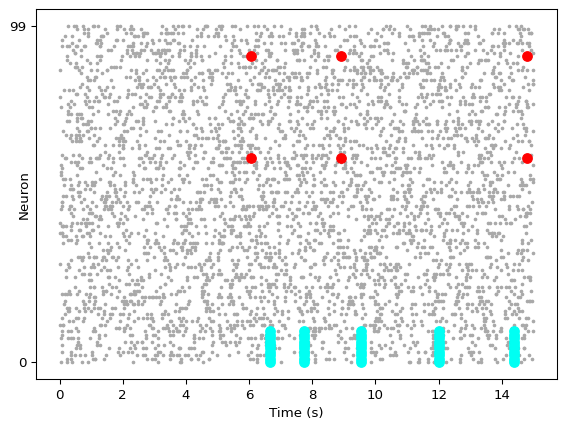

In [27]:
plot_patterns(sts, [patterns[0], patterns[1]])

<span class="theorem-title">**Exercise 11**</span> Plot the first three
patterns found by SPADE.

<span class="theorem-title">**Exercise 12**</span> Plot the last two
patterns found by SPADE.

<span class="theorem-title">**Exercise 13**</span> Plot the
`significant_patterns` extracted by the code in the cell blow.

In [30]:
significant_patterns = []
for pattern in patterns:
    if pattern["pvalue"]<0.05:
        significant_patterns.append(pattern)

<span class="theorem-title">**Exercise 14**</span> The cell below
repeats the SPADE analysis from
<a href="#exm-spade2" class="quarto-xref">Example 8</a> but adds a
parameter for pattern set reduction `psr_param` that makes SPADE exclude
patterns that are a subset of a larger patterns. Extract the list of
significant patterns, as demonstrated in
<a href="#exr-siglist" class="quarto-xref">Exercise 13</a> and plot
them.

In [32]:
patterns = spade(
    spiketrains=sts,
    binsize=1 * pq.ms,
    winlen=1,
    min_occ=3,
    n_surr=100,
    psr_param=[0,0,0]
)["patterns"]

Time for data mining: 0.1933736801147461
Time for pvalue spectrum computation: 27.284683227539062

## 5 Applying SPADE to Real Data

<span class="theorem-title">**Example 10**</span> Load the spike trains
for all neurons in the anterolateral area `"AL"`

In [34]:
sts = utils.load_spike_trains(brain_areas="AL")
print(f"Loaded spke trains from {len(sts)} units")

Loaded spke trains from 41 units

<span class="theorem-title">**Exercise 15**</span> Run SPADE using a
`binsize` of 1 ms and a `winlen` of 2 to find patterns that occurr at
minmum `20` times. Then, find all patterns that are statistically
significant and visualize them.

<span class="theorem-title">**Exercise 16**</span> Rerun SPADE but set
the `binsize` to **4 ms** and the `winlen` to **10** bins. To
counterbalance the increases search window, add the parameter
`min_neu=3` to only search for patterns that encompass at least `3`
neurons and set `min_occ` to **70**. Then, find all patterns that are
statistically significant and visualize them.

<span class="theorem-title">**Exercise 17**</span> (Optional) experiment
with SPADE! Load the data from different brain areas and play with the
parameters of SPADE (HINT: increasing `winlen` and `binsize` increases
the total number patterns detected which increases the comutational load
for statistical evaluation. To counter-balance, you can increase the
value of `min_occ` and `min_neu` to only analyze patterns that occurr
frequently and encompass a larger number of neurons.)